# MCMC

*10 Mar 2020*

Arthur Tsang

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee

## Rotation curve

In [2]:
from functions import diskhalo_fit, expdisk_fit, uniform_fit

In [3]:
data = np.loadtxt('mcmc_files/rotcurve_data.txt')

In [4]:
radius_list, vel_list, vel_err_list = data[:,0], data[:,1], data[:,2]

In [16]:
def log_prob(x):
    #rd, sig0 = x
    vfit_list = [diskhalo_fit(r, *x) for r in radius_list]
    #plt.plot(radius_list, vfit_list)
    #plt.plot(radius_list, vel_list)
    #print(vfit_list)
#     print(vfit_list[0], vel_list[0])
    lprob = -sum((vf-v)**2/(2*ve**2) for v, vf, ve in zip(vel_list, vfit_list, vel_err_list))
    #lprob = sum(-(vf-v)**2 for vf, v in zip(vfit_list, vel_list))
    #print(lprob)
    lprob += sum(np.log(1/np.sqrt(2*np.pi)/ve) for ve in vel_err_list)
    #print(x, lprob)
    if lprob != lprob:
        print('nan!, x=',x)
        return -np.inf
    return lprob

In [20]:
ndim = 4
nwalkers = 10*ndim

In [22]:
p0 = np.random.randn(nwalkers, ndim) #[3,1e7, 5, 1e7]
p0[:,1] *= 1e7
p0[:,3] *= 1e7

In [23]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob)

In [24]:
state = sampler.run_mcmc(p0, 500)

nan!, x= [-9.20674606e-05 -5.11401024e+07 -2.99506121e+00 -2.35278217e+07]
nan!, x= [-1.96066180e-03 -1.00139541e+07 -1.03196634e+00 -1.36838515e+07]
nan!, x= [-8.91971229e-04  1.60454194e+06 -3.02121016e+00 -6.67182728e+07]
nan!, x= [ 8.53587913e-04 -1.18517879e+08 -6.47811642e+00 -1.97060116e+08]
nan!, x= [ 5.41507766e-03  9.39389700e+06  6.63277427e-01 -5.68621823e+07]
nan!, x= [-6.56046491e-04 -4.22139156e+08 -5.51070391e+00 -3.64986032e+07]
nan!, x= [ 4.79094102e-03 -1.08642635e+06 -8.60761847e+00 -4.29724854e+07]
nan!, x= [-5.35983007e-03 -1.12396740e+07  2.33700597e+00 -3.67788004e+07]
nan!, x= [ 2.67480863e-03 -5.32407356e+08 -6.59376527e+00 -8.51230258e+07]
nan!, x= [-1.75950175e-03 -1.06524879e+07 -2.79576834e+00 -1.11956053e+08]
nan!, x= [ 4.08674203e-03 -1.64896527e+06  3.99582826e-01 -8.96854143e+07]
nan!, x= [-4.14064959e-03 -3.48569477e+06 -1.78383230e+00 -9.85980184e+07]
nan!, x= [ 4.02422637e-03 -1.68469871e+06  6.87007751e+00  1.22527718e+08]


In [25]:
sampler.get_chain().shape

(500, 40, 4)

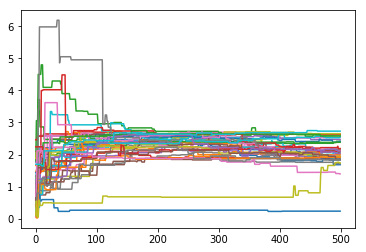

In [26]:
chain = sampler.get_chain()
for walker in range(nwalkers):
    plt.plot(abs(chain[:,walker,0]))

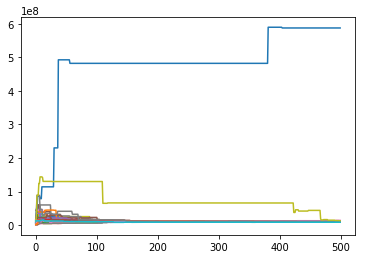

In [27]:
for walker in range(nwalkers):
    plt.plot(abs(chain[:,walker,1]))

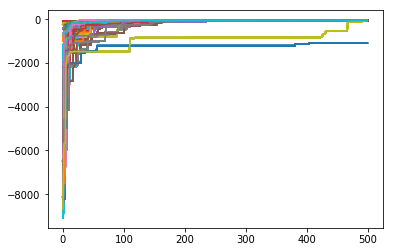

In [28]:
for walker in range(nwalkers):
    plt.plot(sampler.get_log_prob())

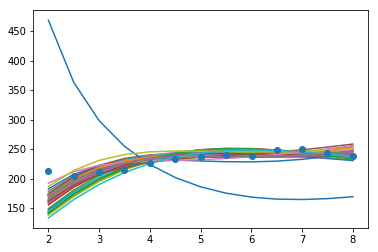

In [31]:
for walker in range(nwalkers):
    x = chain[-1,walker,:]
    plt.plot(radius_list, [diskhalo_fit(r, *x) for r in radius_list])
plt.plot(radius_list, vel_list, 'o')